<a href="https://colab.research.google.com/github/karolinaprygiel/ai-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Wczytywanie danych

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/healthcare-dataset-stroke-data.csv')


### Rzućmy okiem na wczytane dane

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Opisy kolumn (zgodnie z opisem na stronie)
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient  doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dataset zawiera 12 kolumn i 5110 rekordów.<br>
Dataset zawiera zarówno dane dyskretne, ciągłe jak i tekstowe.
  


#Wizualizacja danych


##Przyjrzymy się danym kategorycznym

Text(0.5, 1.0, 'Czy palacz')

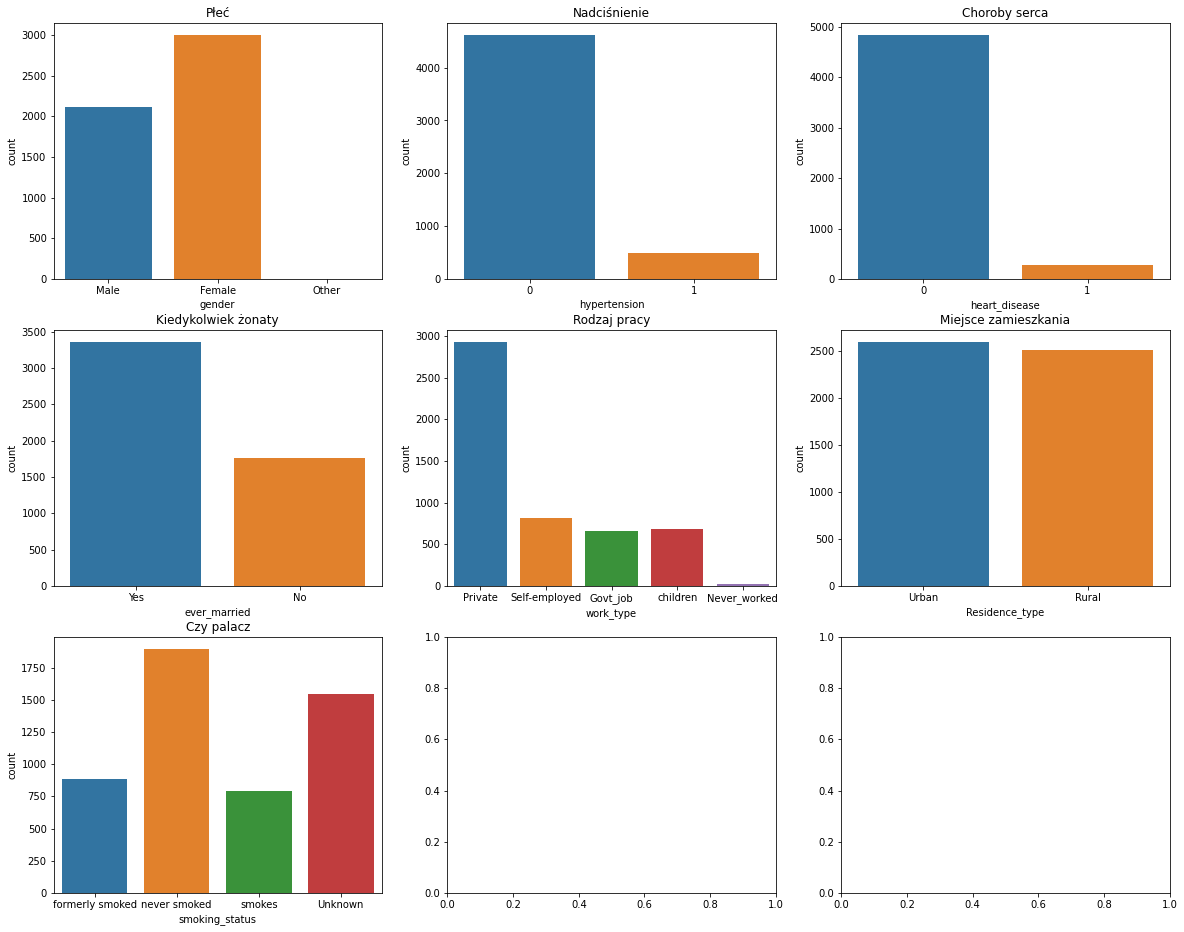

In [49]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease', data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', data=data).set_title("Czy palacz")

####Wnioski


W datasecie jest więcej danych nt. mężczyzn, ale nie jest to różnica bardzo duża.<br>
Zdecydowana większość osób nie ma problemów z sercem ani nadciśnieiem.<br>
Większość danych dotyczy osób pracujących, będących w związku małżeńskim, w większości pracujących w sektorze prywatnym. <br>
Większość osób nigdy nie paliła, ale należy zwrócic uwagę na bardzo dużą ilość brakujących danych na ten temat.


##Podobnie spójrzmy teraz na dane liczbowe

###Wiek

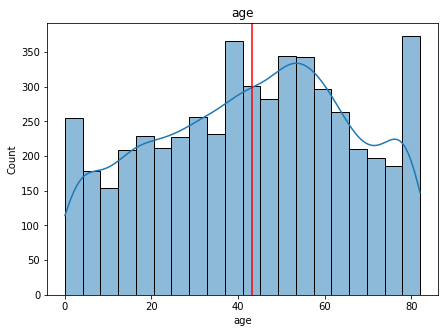

In [146]:
fig = plt.figure(figsize = (7,5))
sns.histplot(data['age'], kde="True", ax=fig.gca()).set_title("age")
plt.axvline(data['age'].mean(), color='red')


###BMI

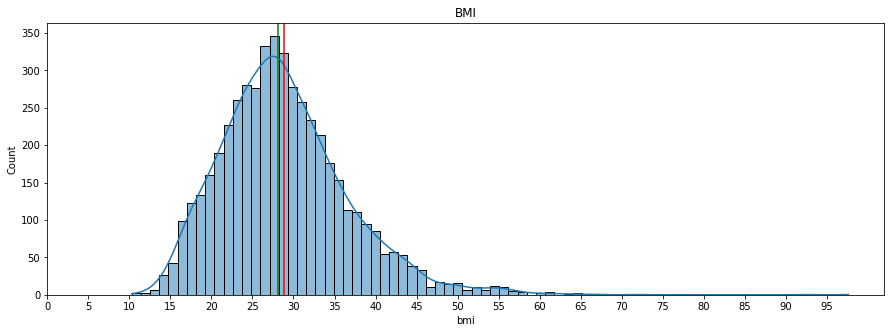

In [158]:
fig = plt.figure(figsize = (15,5))
sns.histplot(data['bmi'], kde="True", ax=fig.gca()).set_title("BMI")
plt.xticks(np.arange(0,100,5))
plt.axvline(data['bmi'].mean(), color='red')
plt.axvline(data['bmi'].median(), color='green')


**NORMY BM**<br>
wygłodzenie – wynik poniżej 16,<br>
wychudzenie – wynik 16-16,9,<br>
niedowaga – wynik 17 - 18,5,<br>
prawidłowa waga – wynik 18,5-24,9,<br>
nadwaga – wynik powyżej 25-29,9,<br>
otyłość – wynik 30-34,9,<br>
otyłość kliniczna – wynik 35-39,9,<br>
otyłość skrajna – wynik powyżej 40<br>

In [166]:
print((data[data["bmi"] > 40 ]).shape[0])
print((data[data["bmi"] > 50 ]).shape[0])

408
79


###Poziom cukru we krwi

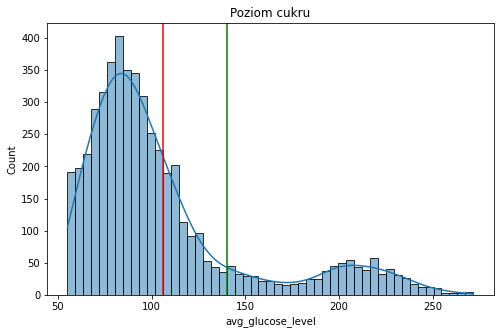

In [167]:
fig = plt.figure(figsize = (8,5))
sns.histplot(data['avg_glucose_level'], kde="True", ax=fig.gca()).set_title("Poziom cukru")
plt.axvline(data['avg_glucose_level'].mean(), color='red')
plt.axvline(140, color='green')


In [64]:
glucose_levels = {'Poziom cukru' : ['< 140 mg/dL', 'Między 140 a 200 mg/dL ', '≥ 200 mg/dL'], 
                  'Interpretacja': ['Prawidłowy poziom glukozy', 'Nieprawidłowy poziom glukozy', 'Cukrzyca']}
glucose_levels_df = pd.DataFrame(glucose_levels)  
glucose_levels_df

,Poziom cukru,Interpretacja
0,< 140 mg/dL,Prawidłowy poziom glukozy
1,Między 140 a 200 mg/dL,Nieprawidłowy poziom glukozy
2,≥ 200 mg/dL,Cukrzyca


###Wnioski

Data set zawiera dane osób ze wszystkich grup wiekowych, ze średnią wieku 40 lat. <br>
BMI zachowuje rozkład normalny, ze średnią wskazującą na nadwagę, uwagę jednak zwraca, że niemal 10% osób jest skrajnie otyła (BMI powyżej 40).<br>
Większość osób ma cukier w normie, ale jest też spora ggrupa osób z cukrzycą.


##Dane kategoryczne vs Udar

Text(0.5, 1.0, 'Czy palacz')

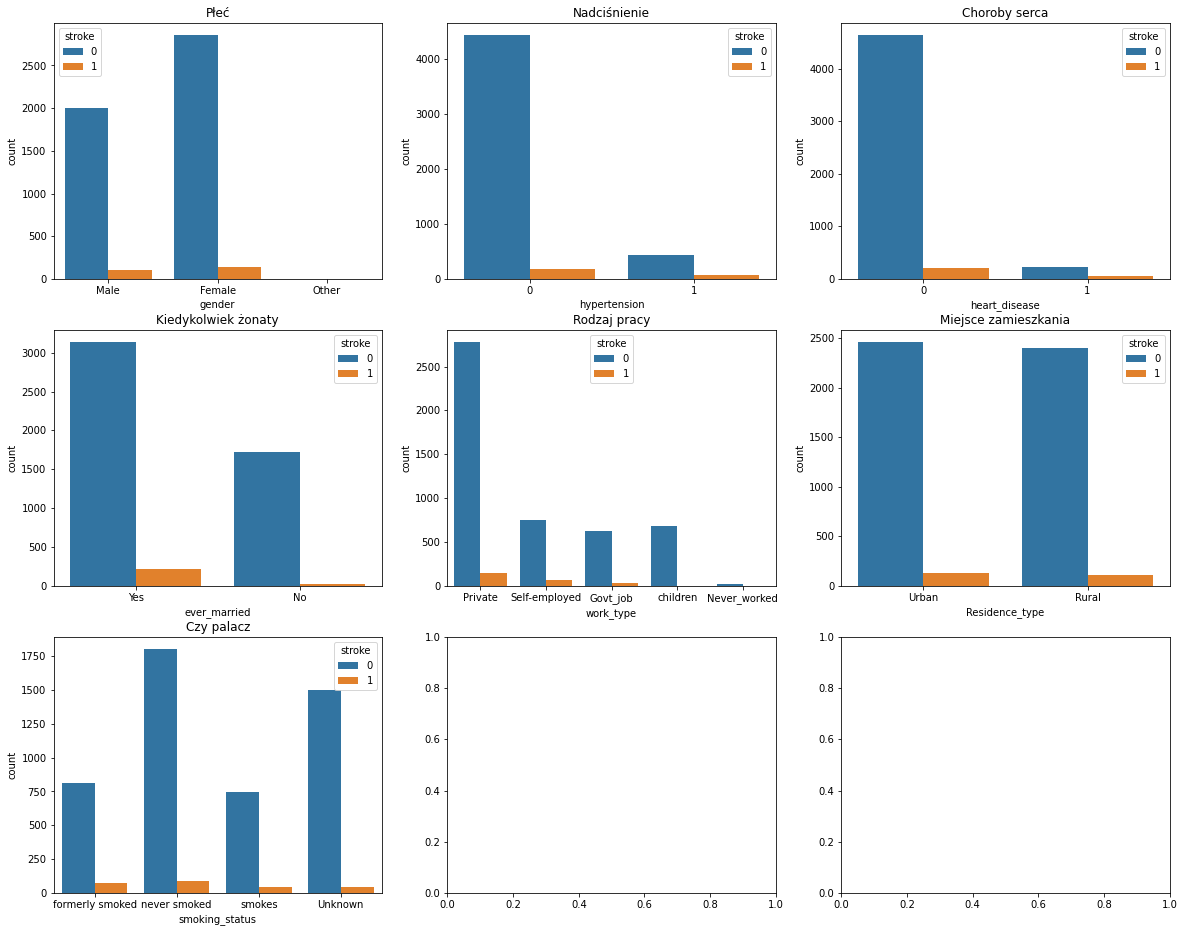

In [154]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', hue="stroke", data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', hue="stroke", data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease',hue="stroke", data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', hue="stroke", data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', hue="stroke", data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', hue="stroke", data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', hue="stroke", data=data).set_title("Czy palacz")

### BMI VS Udar

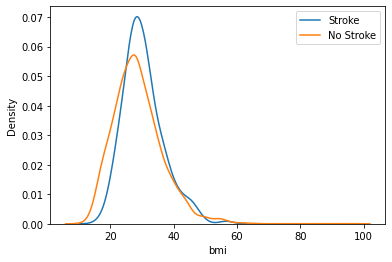

In [139]:
sns.kdeplot(x=data.loc[data['stroke']==1]['bmi'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['bmi'],label='No Stroke')
plt.legend()
plt.show()

###Wiek VS Udar

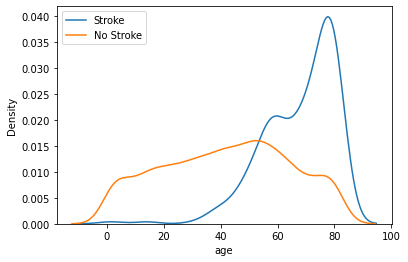

In [140]:
sns.kdeplot(x=data.loc[data['stroke']==1]['age'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['age'],label='No Stroke')
plt.legend()
plt.show()

In [ ]:
Poziom cukru we krwi vs Udar

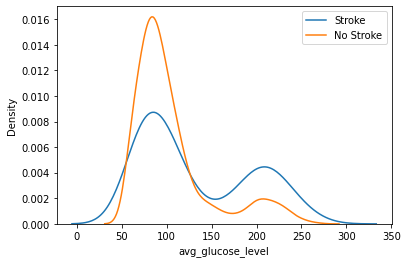

In [142]:
sns.kdeplot(x=data.loc[data['stroke']==1]['avg_glucose_level'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['avg_glucose_level'],label='No Stroke')
plt.legend()
plt.show()

###Wnioski

Widać bardzo dużą zależność pomiędzy wiekiek a wystąpieniem udaru. Zdecydowana większość osób z udarem, miała ponad 40 lat. <br>
Poziom cukru również zdaje się mieć wpływ na wystąpienie udaru. 

###Korelacja

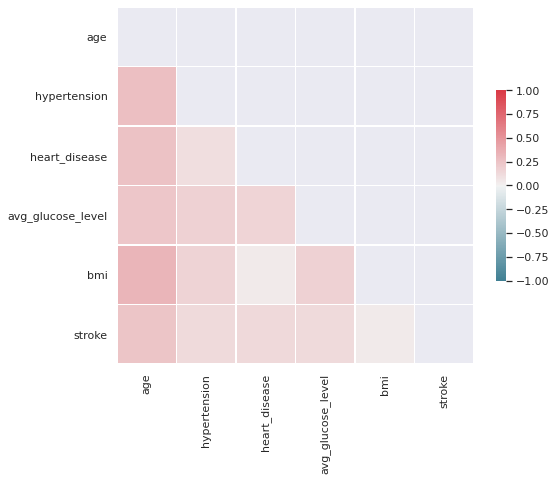

In [ ]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

##Przetwarzanie danych

Spójrzmy jeszcze raz na dane w poszczególnych kolumnach

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Możemy usunąć kolumnę id**

In [ ]:
data.drop(columns=['id'],inplace=True) 
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Problem missing data

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Wartości w kolumnie *bmi* brakuje w ponad 200 rekordach. To niemal 4% wszystkich danych.


Oprócz tego należy pamiętać